In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [2]:
df = pd.read_csv('../data\Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder,systolic,diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [5]:
df.shape

(374, 13)

In [6]:
# Splitting the 'blood_pressure' column into 'systolic' and 'diastolic' columns
# df[['systolic', 'diastolic']] = df['Blood_Pressure'].str.split('/', expand=True).astype(int)

# Dropping the original 'blood_pressure' column if needed
# df.drop(columns=['Blood_Pressure'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep_Duration           374 non-null    float64
 4   Quality_of_Sleep         374 non-null    int64  
 5   Physical_Activity_Level  374 non-null    int64  
 6   Stress_Level             374 non-null    int64  
 7   BMI_Category             374 non-null    object 
 8   Heart_Rate               374 non-null    int64  
 9   Daily_Steps              374 non-null    int64  
 10  Sleep_Disorder           155 non-null    object 
 11  systolic                 374 non-null    int64  
 12  diastolic                374 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [8]:
df['Sleep_Disorder'] = df['Sleep_Disorder'].fillna('None')

In [9]:
df.to_csv("../data\Sleep_health_and_lifestyle_dataset.csv")

In [132]:
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
systolic                    18
diastolic                   17
dtype: int64

In [133]:
df.duplicated().sum()

0

In [134]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,systolic,diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [135]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 10 numerical features : ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'systolic', 'diastolic']

We have 4 categorical features : ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


## UNIVARIATE ANALYSIS 

#### 1. How is Sleep Disorder Distribution ?

In [136]:
Sleep_disorder = df['Sleep_Disorder'].value_counts().reset_index()

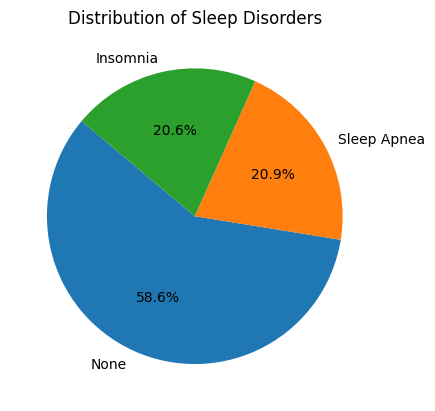

In [137]:
plt.pie(Sleep_disorder['count'], labels=Sleep_disorder['Sleep_Disorder'], autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Sleep Disorders')

plt.show()

#### 2. How is the distribution of Occupations?

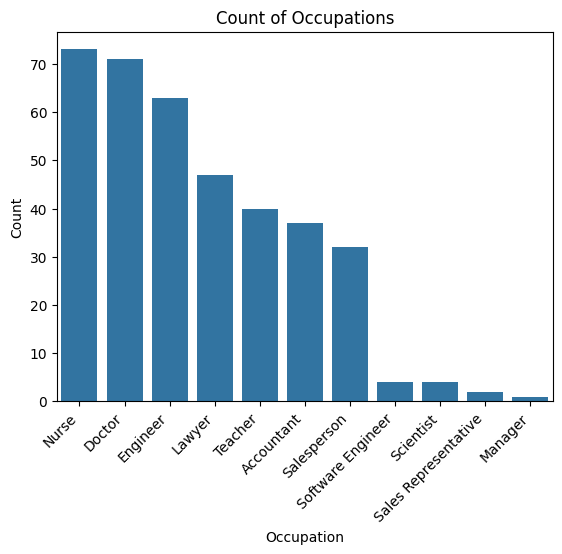

In [138]:
occupation_counts = df['Occupation'].value_counts().reset_index()
sns.barplot(x = occupation_counts['Occupation'],y = occupation_counts['count'])
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count_of_Occupations')
plt.xticks(rotation=45, ha='right')
plt.show()


## BIVARIATE ANALYSIS
### 1. Average Age per Occupation

In [139]:
Avg_age_per_occupation = df.groupby('Occupation')['Age'].mean().sort_values().reset_index()
Avg_age_per_occupation

,Occupation,Age
0,Sales Representative,28.000000
1,Software Engineer,31.250000
2,Doctor,32.676056
3,Scientist,33.500000
4,Lawyer,39.425532
5,Accountant,39.621622
6,Teacher,41.725000
7,Salesperson,43.531250
8,Manager,45.000000
9,Engineer,46.587302


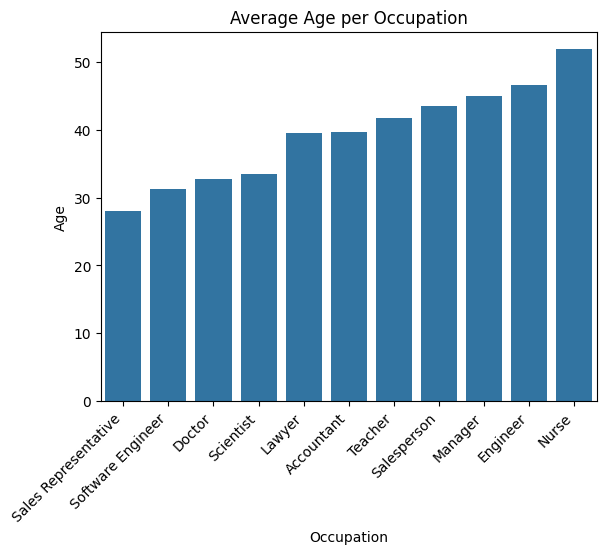

In [140]:
sns.barplot(x = Avg_age_per_occupation['Occupation'],y = Avg_age_per_occupation['Age'])
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Average Age per Occupation')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 2. Distribution of Sleep disorder according to Gender

<Axes: xlabel='Sleep Disorder', ylabel='count'>

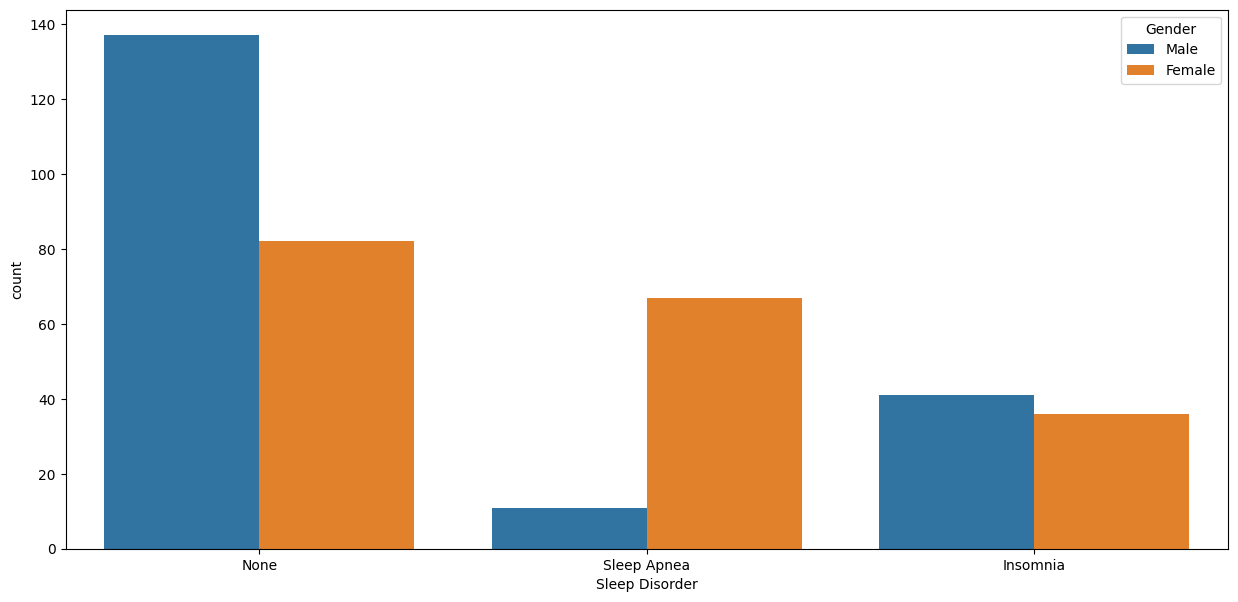

In [141]:
fig, axs = plt.subplots(1, figsize=(15, 7))
sns.countplot(data=df,x='Sleep_Disorder',hue='Gender')

### Insights
-- A higher rate of sleep Disorder is seen in Females

-- Sleep Apnea patients are higher in Females

### 3. Stress levels in Different Jobs

<Axes: xlabel='Occupation', ylabel='count'>

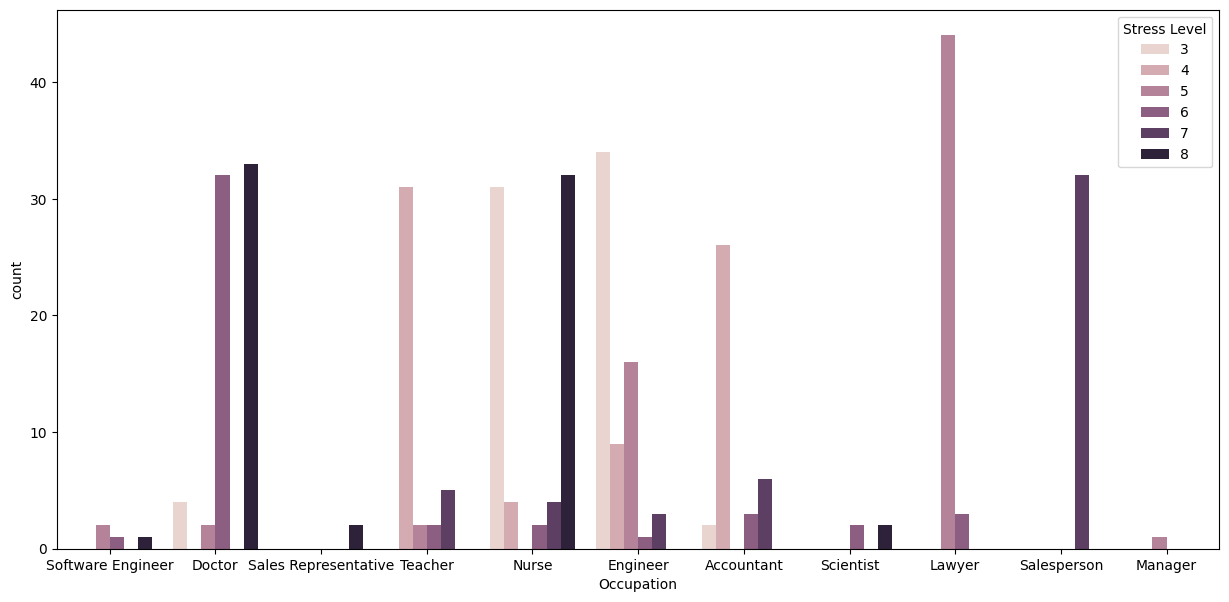

In [142]:
fig, axs = plt.subplots(1, figsize=(15, 7))
sns.countplot(data=df, x='Occupation', hue="Stress_Level")

### Insights:
1. Sales related Jobs are seen to be stressfull
2. Nursing profession has a combination of highly stressfull as well as less stressfull jobs



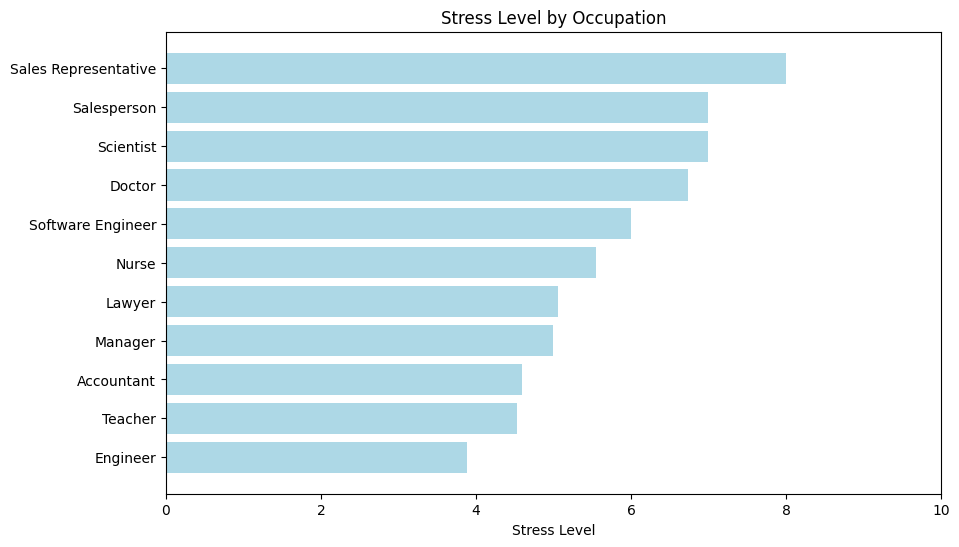

In [143]:
Occupation_stress = df.groupby("Occupation")['Stress_Level'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
plt.barh(Occupation_stress['Occupation'], Occupation_stress['Stress_Level'], color='lightblue')
plt.xlabel('Stress Level')
plt.title('Stress Level by Occupation')
plt.xlim(0, 10)  # Set x-axis limits from 0 to 10
plt.gca().invert_yaxis()  # Invert y-axis to display highest stress at the top
plt.show()

### Insights:
Engineering and Teaching Jobs tend to have Lower level of Stress followed by accountant, Lawyer and Manager

### 4. Sleep Disorder in Different Professions

In [144]:
age_count=df['Age'].value_counts().reset_index()

In [145]:
Occupation_count=df.groupby('Sleep_Disorder')['Occupation'].value_counts().reset_index()
Occupation_count

,Sleep Disorder,Occupation,count
0,Insomnia,Salesperson,29
1,Insomnia,Teacher,27
2,Insomnia,Accountant,7
3,Insomnia,Engineer,5
4,Insomnia,Doctor,3
5,Insomnia,Nurse,3
6,Insomnia,Lawyer,2
7,Insomnia,Software Engineer,1
8,None,Doctor,64
9,None,Engineer,57


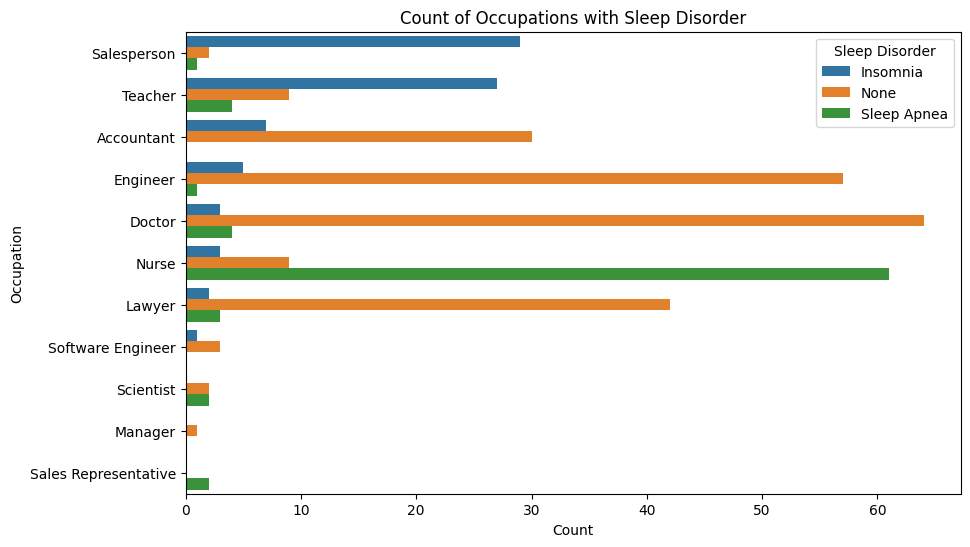

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Occupation', hue='Sleep_Disorder', data=Occupation_count)
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Count of Occupations with Sleep Disorder')
plt.show()

### Insights
1. Maximum insomnia Cases are seen in Teachers and Sales Persons
2. Maximum Sleep Apnea cases are seen in Nurses as compared to all other Occupations

### 5. Average Sleep Durations in different Profession

In [147]:
df.groupby('Occupation')['Sleep_Duration'].mean().sort_values().reset_index()

,Occupation,Sleep Duration
0,Sales Representative,5.900000
1,Scientist,6.000000
2,Salesperson,6.403125
3,Teacher,6.690000
4,Software Engineer,6.750000
5,Manager,6.900000
6,Doctor,6.970423
7,Nurse,7.063014
8,Accountant,7.113514
9,Lawyer,7.410638


### Insights
1. Effect of Insomnia can be seen in case of Sales representative with lowest average sleep time
2. Enginners and Lawyers have moderately high sleep time which shows less count of Sleep Disorders

### 6. Effect of Heart rate on stress and Sleep Disorders

In [148]:
Stress_HR = df.groupby('Stress_Level')['Heart_Rate'].mean().reset_index()
Stress_HR

,Stress Level,Heart Rate
0,3,67.098592
1,4,66.828571
2,5,70.074627
3,6,70.717391
4,7,73.300000
5,8,74.100000


<Axes: xlabel='Stress Level', ylabel='Heart Rate'>

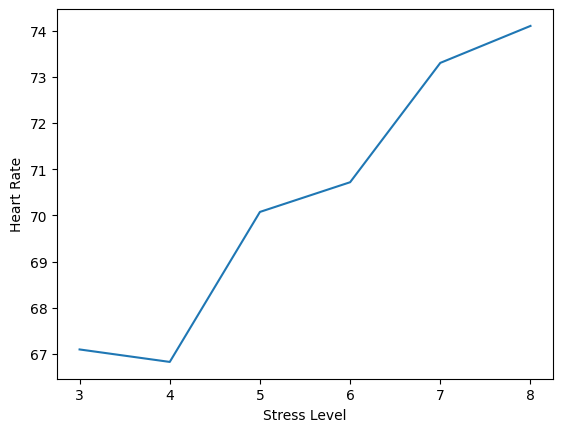

In [149]:
sns.lineplot(x = Stress_HR['Stress_Level'],y= Stress_HR['Heart_Rate'])

In [150]:
Heart_rate=df.groupby('Sleep_Disorder')['Heart_Rate'].mean().reset_index()
Heart_rate

,Sleep Disorder,Heart Rate
0,Insomnia,70.467532
1,None,69.018265
2,Sleep Apnea,73.089744


### Insights
1. Stress Levels are directly proportional to Increased Heart rates
2. Higher Verage Heart rates are seen in people with Sleep Disorders

### 7. Relationship of stress level and age

In [151]:
Disorder_age =df.groupby('Stress_Level')['Age'].mean().reset_index()
Disorder_age

,Stress Level,Age
0,3,54.169014
1,4,39.900000
2,5,40.313433
3,6,33.065217
4,7,42.680000
5,8,39.742857


<Axes: xlabel='Stress Level', ylabel='Age'>

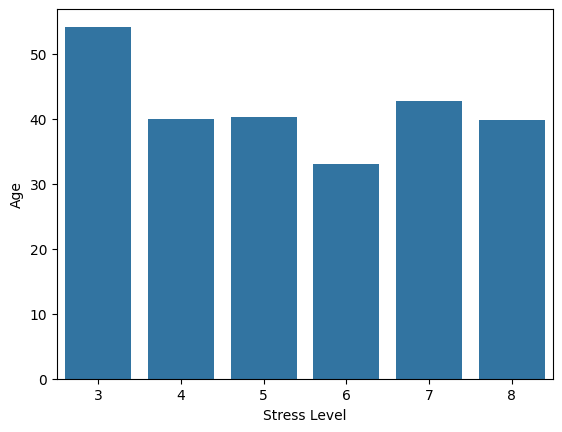

In [152]:
sns.barplot(x=Disorder_age['Stress_Level'], y = Disorder_age['Age'])

In [153]:
sys_occupation = df.groupby('Occupation')['systolic'].mean().sort_values().reset_index()

In [154]:
diastolic_occupation = df.groupby('Occupation')['diastolic'].mean().sort_values().reset_index()

In [155]:
BP_occupation = pd.merge(sys_occupation, diastolic_occupation, on='Occupation', how='inner')
BP_occupation

,Occupation,systolic,diastolic
0,Accountant,117.729730,76.918919
1,Doctor,123.000000,80.507042
2,Manager,125.000000,82.000000
3,Engineer,125.904762,81.380952
4,Software Engineer,126.500000,83.250000
5,Scientist,129.500000,85.500000
6,Lawyer,129.957447,85.000000
7,Salesperson,130.000000,85.000000
8,Teacher,131.225000,86.900000
9,Nurse,138.520548,93.726027


##   MULTIVARIATE ANALYSIS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


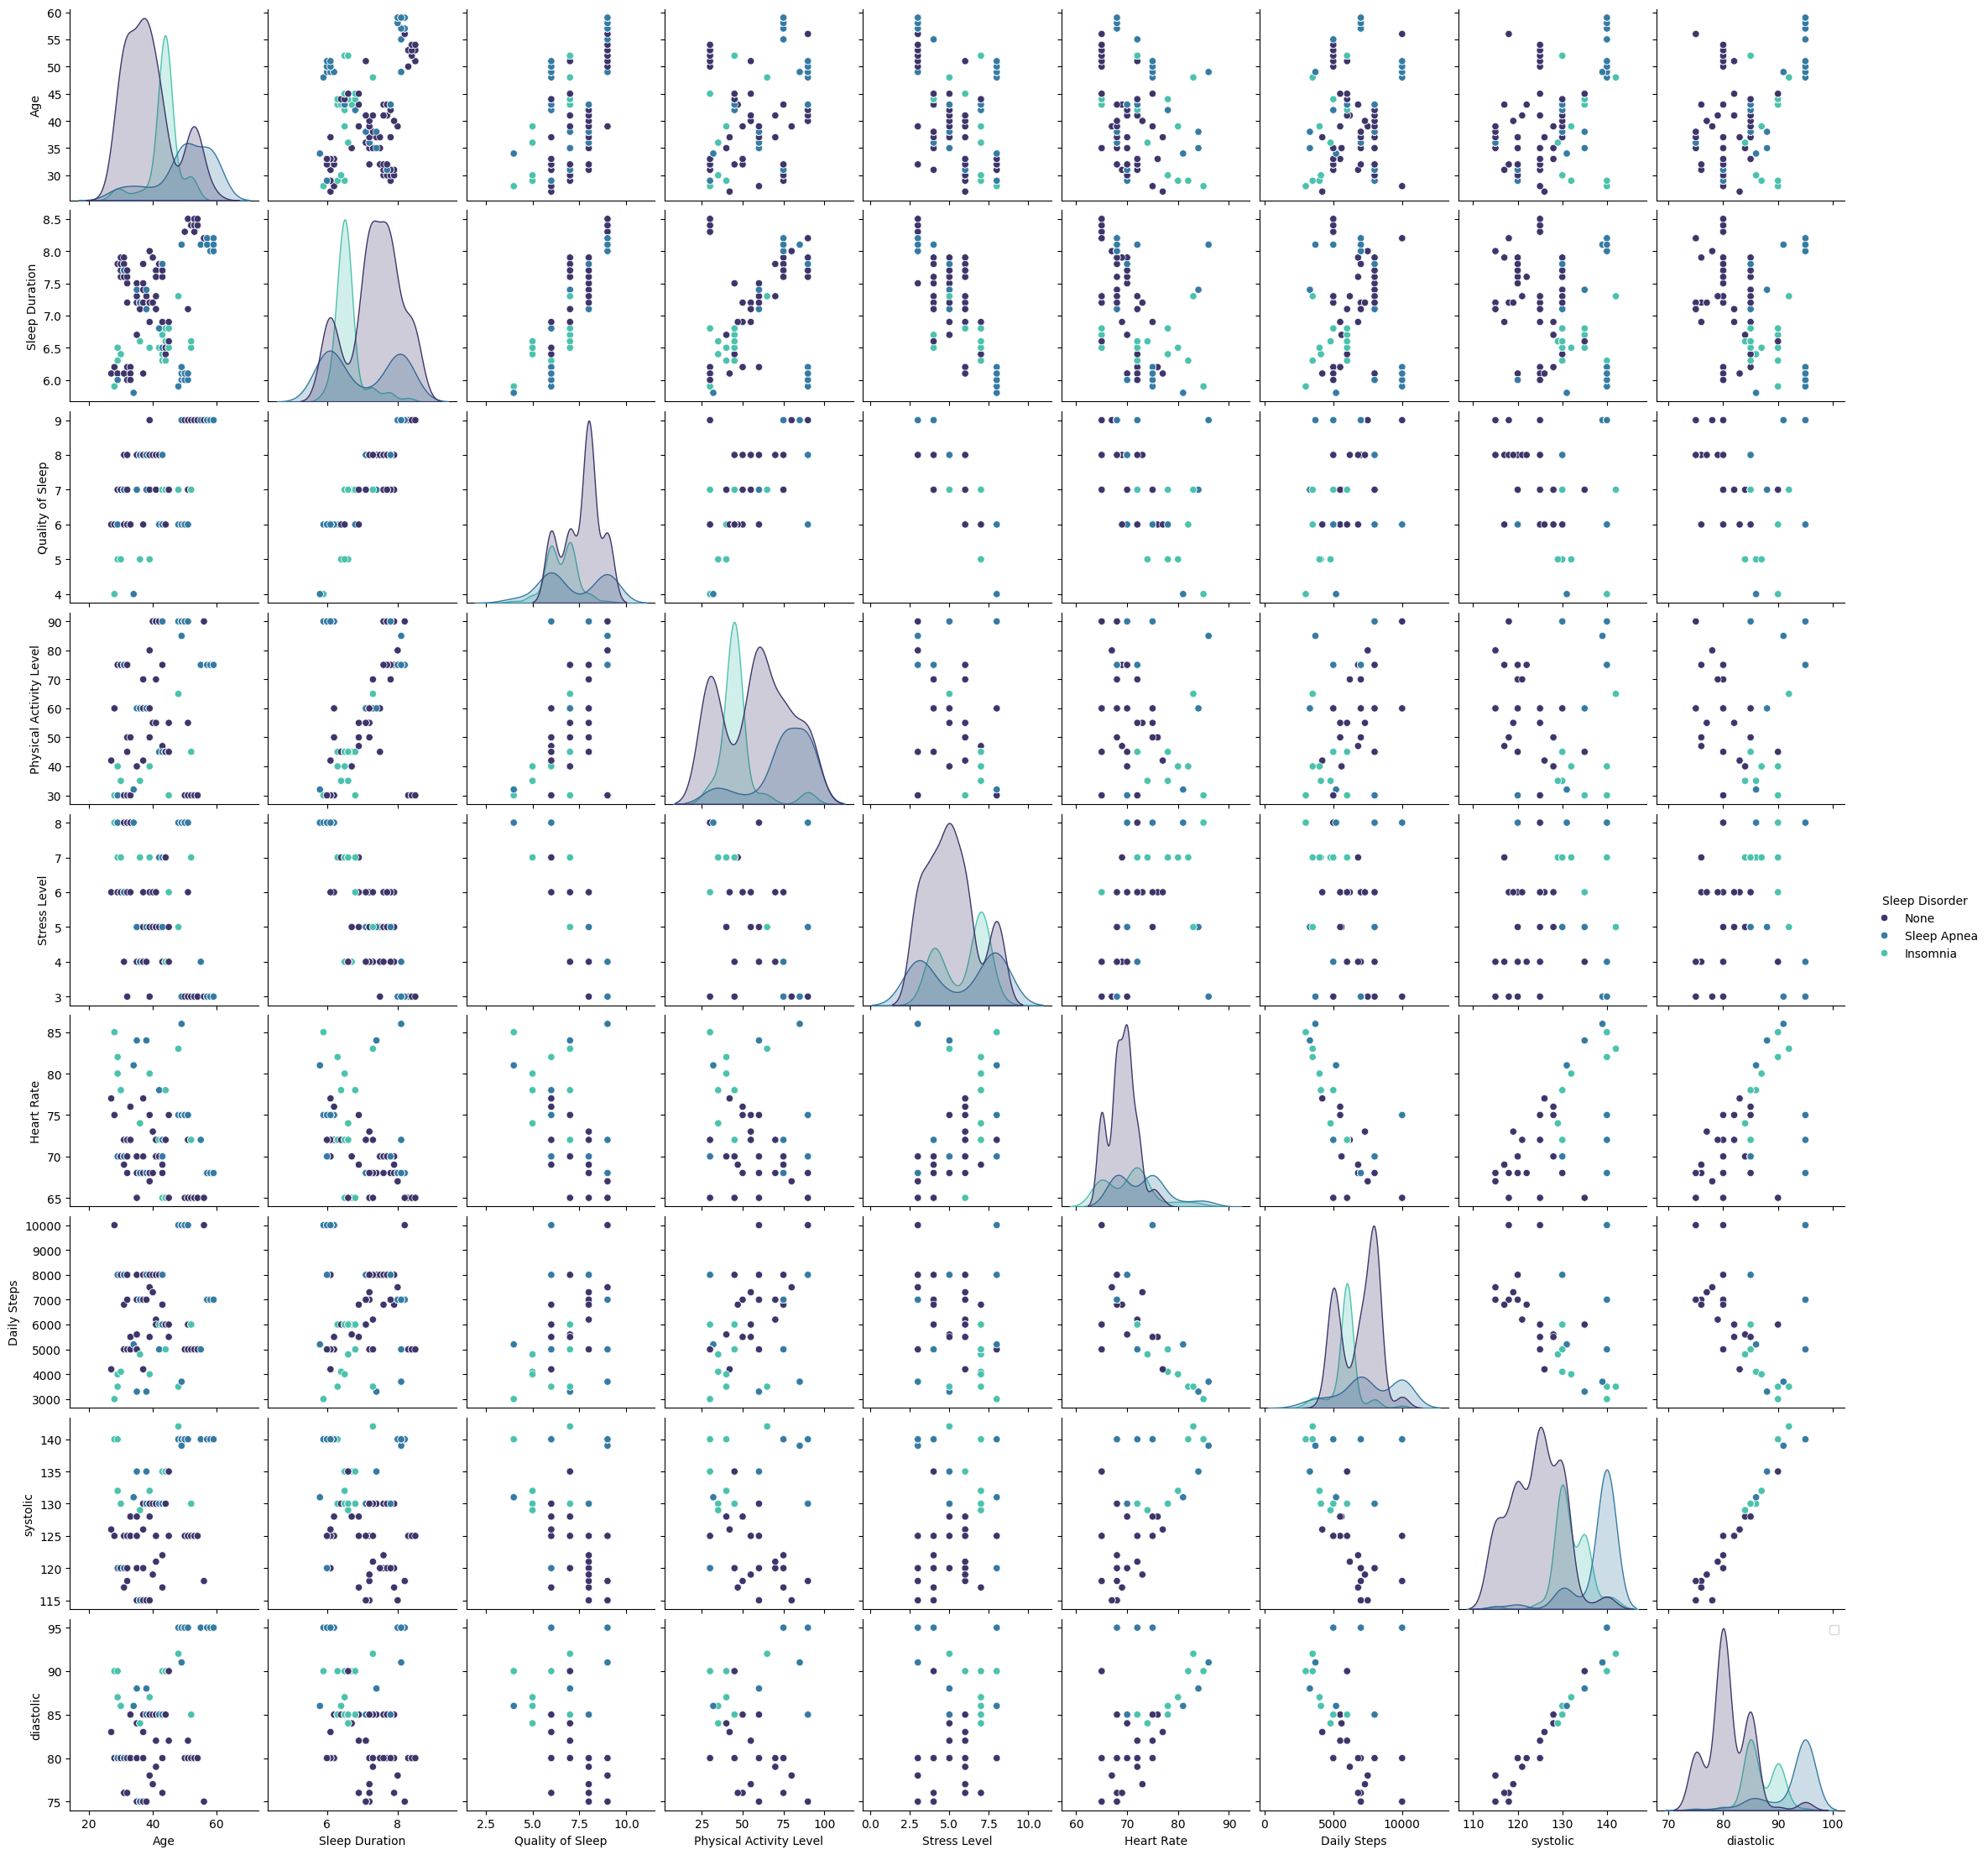

In [156]:
sns.pairplot(data=df.drop('Person_ID',axis=1),hue='Sleep_Disorder',palette='mako')
plt.legend()
plt.show()

## Conclusions:
1. Higher level of stress are Reason for Increased Heart rate and therefore Sleep Disorders
2. Stress levels decrease with increase in Age
3. Inspite of lower stress level professions like Teacher have higher cases of Insomnia and higher blood pressure levels
4. Sleep Apnea is seen more in Women as compared to Men.
5. HIgher Blood Pressure Lead to Sleep related disorders